In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
a = np.array([305,305.3333333,305.6666667,306,306.3333333,306.6666667,307,307.3333333,307.6666667,308,308.3333333,308.6666667,309,309.3333333,309.6666667,310,310.3333333,310.6666667,311,311.3333333,311.6666667,312,312.3333333,312.6666667,313,313.3333333,313.6666667,314,314.3333333,314.6666667,315])
i1 =  np.array([0,0.03,1.87,3.29,8.51,8.47,14.22,19.03,24.03,22.2,19.43,10.59,6.12,3.92,1.33,0.05,-0.46,-0.89,-0.8,-0.84,-0.78,-0.77,-0.72,-0.56,-0.55,-0.45,-0.4,-0.15,-0.04,0.02,0.43]) #160 V
i2 = np.array([0,-0.38,0.93,1.15,2.13,5.01,12.09,16.82,17.73,17.35,14.43,6.51,3.28,-0.21,-2.3,-3.31,-3.74,-3.95,-4.13,-4.27,-4.28,-4.58,-4.51,-4.71,-4.73,-4.61,-4.72,-4.67,-4.69,-4.61,-4.93]) #180 V
i3 = np.array([0,0.35,1.03,2.62,5.85,11.89,17.89,22.46,27.96,30.76,26.25,19.06,10.96,7.02,4.27,2.7,1.87,1.34,0.96,0.7,0.67,0.47,0.7,0.77,0.82,1.15,1.36,1.41,1.65,1.83,1.99]) #200V

da = 261 + 0 + (48/180)

a -= da
n = 2*np.sin((a/2 + 30)*np.pi/180)

a = a[n>1.581]
i1 = i1[n>1.581]
i2 = i2[n>1.581]
i3 = i3[n>1.581]
n = n[n>1.581]

i1 += 4.94
i2 += 4.94
i3 += 4.94

wavs = np.array([0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.7,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.9,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.1,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.2,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.3,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.4,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.5])
ns = np.array([1.696015997,1.687661228,1.680474916,1.674223707,1.668734299,1.663874858,1.65954303,1.655657945,1.65215474,1.648980697,1.646092474,1.643454064,1.641035287,1.638810634,1.636758386,1.634859926,1.6330992,1.631462285,1.629937046,1.628512857,1.627180369,1.625931328,1.624758415,1.623655123,1.62261564,1.621634767,1.620707832,1.619830632,1.618999372,1.618210619,1.617461258,1.61674846,1.616069645,1.615422463,1.614804761,1.614214569,1.61365008,1.613109631,1.612591693,1.612094855,1.611617815,1.61115937,1.610718404,1.610293883,1.609884849,1.609490411,1.609109737,1.608742057,1.608386648,1.608042839,1.607710001,1.607387546,1.607074923,1.606771617,1.606477144,1.606191048,1.605912905,1.605642311,1.605378889,1.605122283,1.604872158,1.604628198,1.604390102,1.60415759,1.603930394,1.603708263,1.603490956,1.603278248,1.603069924,1.60286578,1.602665625,1.602469273,1.602276552,1.602087296,1.601901347,1.601718555,1.601538777,1.601361879,1.601187729,1.601016205,1.600847189,1.600680568,1.600516234,1.600354086,1.600194025,1.600035957,1.599879792,1.599725445,1.599572833,1.599421878,1.599272503,1.599124637,1.59897821,1.598833155,1.598689409,1.598546909,1.598405598,1.598265418,1.598126316,1.597988237,1.597851133,1.597714955,1.597579655,1.597445189,1.597311515,1.597178589,1.597046371,1.596914824,1.596783909,1.596653591,1.596523834,1.596394604,1.596265871,1.596137601,1.596009765,1.595882333,1.595755277,1.59562857,1.595502185,1.595376096,1.595250278,1.595124708,1.594999361,1.594874216,1.59474925,1.594624443,1.594499773,1.59437522,1.594250766,1.59412639,1.594002076,1.593877805,1.59375356,1.593629324,1.593505081,1.593380815,1.593256511,1.593132153,1.593007727,1.592883219,1.592758615,1.592633901,1.592509065,1.592384093,1.592258973,1.592133693,1.592008241,1.591882606,1.591756776,1.59163074,1.591504488,1.591378008,1.591251291,1.591124327,1.590997105,1.590869617,1.590741853,1.590613803,1.59048546,1.590356813,1.590227854,1.590098576,1.589968969,1.589839026,1.589708738,1.589578099,1.5894471,1.589315734,1.589183993,1.589051871,1.58891936,1.588786454,1.588653145,1.588519427,1.588385293,1.588250737,1.588115753,1.587980335,1.587844475,1.587708168,1.587571409,1.587434191,1.587296508,1.587158356,1.587019727,1.586880617,1.586741021,1.586600932,1.586460346,1.586319258,1.586177661,1.586035552,1.585892925,1.585749775,1.585606097,1.585461887,1.585317139,1.585171849,1.585026013,1.584879624,1.58473268,1.584585175,1.584437105,1.584288466,1.584139252,1.58398946,1.583839085,1.583688124,1.583536571,1.583384423,1.583231675,1.583078323,1.582924364,1.582769792,1.582614604,1.582458797,1.582302365,1.582145305,1.581987613])

wavs = wavs[np.argsort(ns)]
ns = np.sort(ns)

wav = np.interp(n, ns, wavs)

#for a, b in zip(wav, n):
    #print(a, b)

print(i3)


[ 7.56 10.79 16.83 22.83 27.4  32.9  35.7  31.19 24.   15.9  11.96  9.21
  7.64  6.81  6.28  5.9   5.64  5.61  5.41  5.64  5.71  5.76  6.09  6.3
  6.35  6.59  6.77  6.93]


In [ ]:
v1, v2, v3 = 160.6, 181.2, 200.4
I1, I2, I3 = 0.360, 0.385, 0.406

r1 = v1/I1
r2 = v2/I2
r3 = v3/I3

t1 = 20 + 273 + (r1/37 - 1)/4.5e-3
t2 = 20 + 273 + (r2/37 - 1)/4.5e-3
t3 = 20 + 273 + (r3/37 - 1)/4.5e-3

print(t1,t2,t3)

2750.123790457124 2897.5006045006044 3035.318673353156


28.970000000000002 22.67 35.7


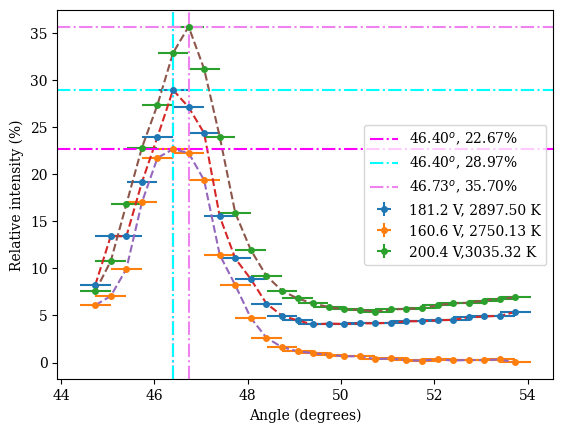

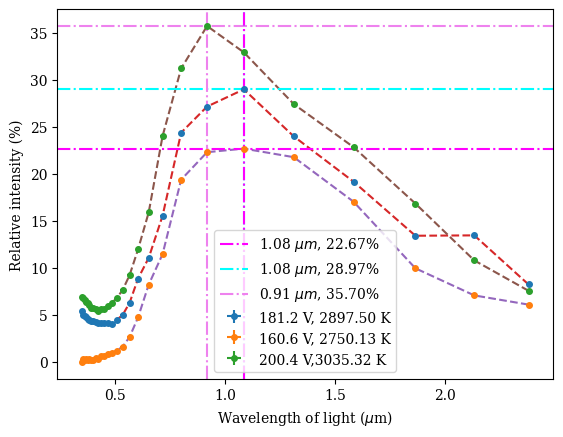

0.9172501128093912 0.7994679787845133


In [ ]:
#plt.scatter(a,i2,  label='160.6 V')
#plt.scatter(a,i1, label='181.2 V')
#plt.scatter(a,i3,  label='200.4 V')
plt.errorbar(a,i1, yerr=0.01, xerr=0.33, fmt='o', label='181.2 V, 2897.50 K', markersize = 4)
plt.errorbar(a,i2, yerr=0.01, xerr=0.33, fmt='o', label='160.6 V, 2750.13 K', markersize = 4)
plt.errorbar(a,i3, yerr=0.01, xerr=0.33, fmt='o', label='200.4 V,3035.32 K', markersize = 4)
plt.plot(a,i1,linestyle='--')
plt.plot(a,i2,linestyle='--')
plt.plot(a,i3,linestyle='--')
plt.axhline(np.max(i1), linestyle = '-.', color = 'cyan')
plt.axhline(np.max(i2), linestyle = '-.', color = 'magenta')
plt.axhline(np.max(i3), linestyle = '-.', color = 'violet')
plt.axvline(46.40000003, linestyle = '-.', color = 'magenta', label='46.40$^o$, 22.67%' )
plt.axvline(46.40000003, linestyle = '-.', color = 'cyan', label='46.40$^o$, 28.97%')
plt.axvline( 46.73333333, linestyle = '-.', color = 'violet', label='46.73$^o$, 35.70%')
plt.xlabel('Angle (degrees)')
plt.ylabel('Relative intensity (%)')
plt.legend()
print (np.max(i1), np.max(i2), np.max(i3))
plt.show()

#plt.scatter(wav,i2)
#plt.scatter(wav,i1)
#plt.scatter(wav,i3)
plt.errorbar(wav,i1, yerr=0.01, xerr=0.01, fmt='o', label='181.2 V, 2897.50 K', markersize = 4)
plt.errorbar(wav,i2, yerr=0.01, xerr=0.01, fmt='o', label='160.6 V, 2750.13 K', markersize = 4)
plt.errorbar(wav,i3, yerr=0.01, xerr=0.01, fmt='o', label='200.4 V,3035.32 K', markersize = 4)
plt.plot(wav,i1,linestyle='--')
plt.plot(wav,i2,linestyle='--')
plt.plot(wav,i3,linestyle='--')
plt.axhline(np.max(i2), linestyle = '-.', color = 'magenta', label='1.08 $\mu m$, 22.67%')
plt.axhline(np.max(i1), linestyle = '-.', color = 'cyan', label='1.08 $\mu m$, 28.97%')
plt.axhline(np.max(i3), linestyle = '-.', color = 'violet', label='0.91 $\mu m$, 35.70%')
plt.axvline(wav[5], linestyle = '-.', color = 'cyan')
plt.axvline(wav[5], linestyle = '-.', color = 'magenta')
plt.axvline(wav[6], linestyle = '-.', color = 'violet')
plt.xlabel('Wavelength of light ($\mu$m)')
plt.ylabel('Relative intensity (%)')
plt.legend()
plt.show()
print(wav[6], wav[7])

[ 1  5 15]


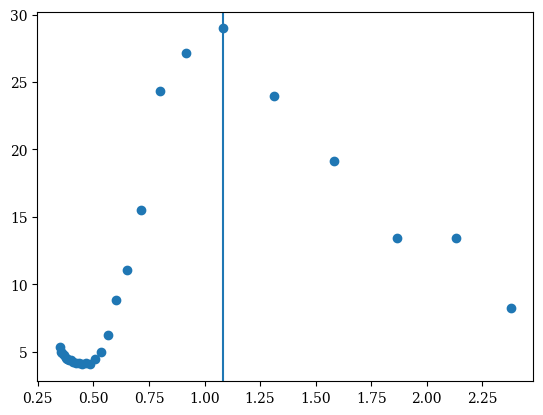

1.084298225759202
[ 5 19 22 24 26]


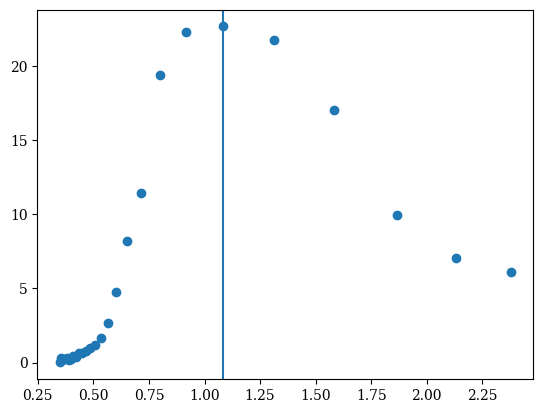

1.084298225759202
[6]


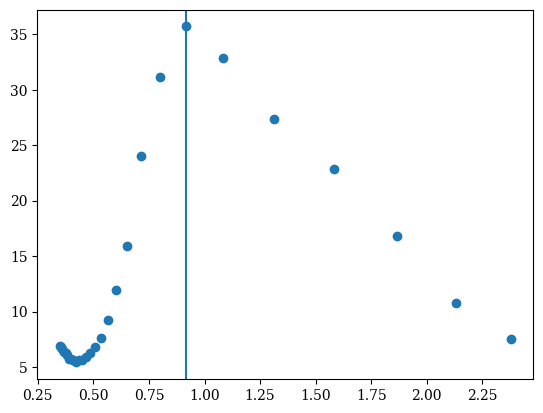

0.9172501128093912


In [ ]:
peak,_ = find_peaks(i1)
print(peak)

plt.scatter(wav,i1)
plt.axvline(wav[5])
plt.show()

print(wav[5])

peak,_ = find_peaks(i2)
print(peak)

plt.scatter(wav,i2)
plt.axvline(wav[5])
plt.show()

print(wav[5])

peak,_ = find_peaks(i3)
print(peak)

plt.scatter(wav,i3)
plt.axvline(wav[6])
plt.show()

print(wav[6])

## WIENS CONSTANT

In [ ]:
w1 = wav[5]*1e-6
w2 = wav[5]*1e-6
w3 = wav[6]*1e-6

W1 = w1*t1*1e3
W2 = w2*t2*1e3
W3 = w3*t3*1e3

print(W1,W2,W3)

2.981954346610831 3.1417547645962207 2.784146395545634


In [ ]:
def werr(w):
    return abs(2.898 - w)/2.898*100

print(werr(W1))
print(werr(W2))
print(werr(W3))

2.8969753833965153
8.411137494693602
3.9286958058787547


## PLANCK'S CONSTANT

In [ ]:
def planck(ind, wav, i1, t1, i2, t2):
    kb = 1.38e-23
    c = 2.99e+8
    aa = wav[ind]*kb/c*1e-6
    bb = np.log(i1[ind]/i2[ind])
    cc = t1*t2/(t1-t2)
    return aa*bb*cc

In [ ]:
for ii in range(len(wav)):
    aaaa = planck(ii, wav, i1, t1, i2, t2)
    bbbb = abs(6.626070e-34 - aaaa)/6.626070e-34*100
    if bbbb <= 50:
        print(ii)
        print(aaaa)
        print(bbbb)
        print("\n")

In [ ]:
for ii in range(len(wav)):
    aaaa = planck(ii, wav, i3, t3, i1, t1)
    bbbb = abs(6.626070e-34 - aaaa)/6.626070e-34*100
    if bbbb <= 50:
        print(ii)
        print(aaaa)
        print(bbbb)
        print("\n")

2
5.719911590453162e-34
13.675654038469837


3
3.7470570007285333e-34
43.449782439235726


6
3.3969261947488386e-34
48.733922298604774


8
4.204309961792759e-34
36.5489654985118




In [ ]:
for ii in range(len(wav)):
    aaaa = planck(ii, wav, i3, t3, i2, t2)
    bbbb = abs(6.626070e-34 - aaaa)/6.626070e-34*100
    if bbbb <= 50:
        print(ii)
        print(aaaa)
        print(bbbb)
        print("\n")

4
8.900845471582141e-34
34.3306888031992




In [ ]:
#Wavelengths to use: 6,10,12,13
print(wav[5])
print(wav[6])
print(wav[10])
print(wav[11])

1.084298225759202
0.9172501128093912
0.6035719452965812
0.5649751770212046


In [ ]:
def planck(i1, t1, i2, t2):
    kb = 1.38e-23
    c = 2.99e+8
    aa = wav[5]*kb/c*1e-6
    bb = np.log(i1/i2)
    cc = t1*t2/(t1-t2)
    return aa*bb*cc

planck(22.67,t1,28.97,t2)


6.635233652745655e-34

In [ ]:
planck(31.19,t3,28.97,t2)


2.358037477261351e-34

In [ ]:
planck(22.67,t1,31.19,t3)

4.673444590499218e-34